## 知識情報学 第3回演習サンプルプログラム ex3.ipynb
- Programmed by Nattapong Thammasan, 監修　福井健一
- Last updated: 2019/10/14
- Checked with Python 3.8.8, scikit-learn 1.0
- MIT License

## 決定木学習による識別と決定木の描画
- 要scikit-learn 0.21以降

In [1]:
%matplotlib inline
from sklearn import datasets
import numpy as np
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import precision_recall_fscore_support
import matplotlib.pyplot as plt

In [2]:
# テストデータの割合
test_proportion = 0.3
# Iris データセットをロード  
iris = datasets.load_iris()
# 特徴ベクトルを取得
X = iris.data
# クラスラベルを取得
y = iris.target

In [3]:
# 学習データとテストデータに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_proportion, random_state = 1)

In [4]:
# エントロピーを指標とする決定木のインスタンスを生成し，決定木のモデルに学習データを適合させる
tree= DecisionTreeClassifier(criterion='entropy', max_depth=2)
trained_model = tree.fit(X_train, y_train)

### 得られた決定木の描画

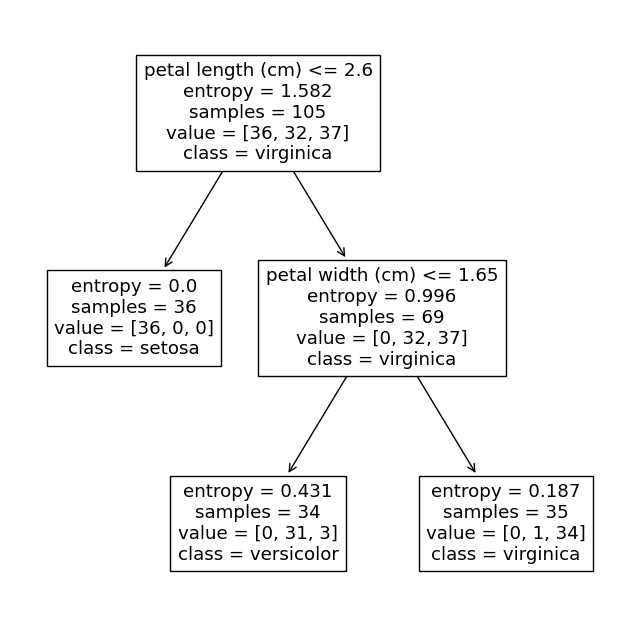

In [5]:
plt.figure(figsize=[8,8])
plot_tree(trained_model, feature_names=iris.feature_names, class_names=list(iris.target_names))
plt.show()

### 課題1(a) 学習した決定木を用いて学習データおよびテストデータのクラスを予測し，結果をy_train_predicted, y_test_predictedに格納する
- https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_fscore_support.html

In [6]:
y_train_predicted = trained_model.predict(X_train)
y_test_predicted = trained_model.predict(X_test)

In [7]:
# テストデータの正解クラスと決定木による予測クラスを出力
print("Test Data")
print("True Label     ", y_test)
print("Predicted Label", y_test_predicted)

Test Data
True Label      [0 1 1 0 2 1 2 0 0 2 1 0 2 1 1 0 1 1 0 0 1 1 1 0 2 1 0 0 1 2 1 2 1 2 2 0 1
 0 1 2 2 0 2 2 1]
Predicted Label [0 1 1 0 2 1 2 0 0 2 1 0 2 1 1 0 1 1 0 0 1 1 2 0 2 1 0 0 1 2 1 2 1 2 2 0 1
 0 1 2 2 0 1 2 1]


### 課題1(b) 関数precision_recall_fscore_supportを使用して，学習データおよびテストデータに対するprecision，recall，F値の算出しfscore_train, fscore_testに格納する

In [8]:
fscore_train =  precision_recall_fscore_support(y_train, y_train_predicted)
fscore_test =  precision_recall_fscore_support(y_test, y_test_predicted)


### 平均precision, recall, F値

In [9]:
print('Training data')
print('Class 0 Precision: %.3f, Recall: %.3f, Fscore: %.3f' % 
      (fscore_train[0][0], fscore_train[1][0], fscore_train[2][0]))
print('Class 1 Precision: %.3f, Recall: %.3f, Fscore: %.3f' % 
      (fscore_train[0][1], fscore_train[1][1], fscore_train[2][1]))
print('Class 2 Precision: %.3f, Recall: %.3f, Fscore: %.3f' % 
      (fscore_train[0][2], fscore_train[1][2], fscore_train[2][2]))
print('Average Precision: %.3f, Recall: %.3f, Fscore: %.3f' % 
      (np.average(fscore_train[0]), np.average(fscore_train[1]), np.average(fscore_train[2])))

print('Test data')
print('Class 0 Precision: %.3f, Recall: %.3f, Fscore: %.3f' % 
      (fscore_test[0][0], fscore_test[1][0], fscore_test[2][0]))
print('Class 1 Precision: %.3f, Recall: %.3f, Fscore: %.3f' % 
      (fscore_test[0][1], fscore_test[1][1], fscore_test[2][1]))
print('Class 2 Precision: %.3f, Recall: %.3f, Fscore: %.3f' % 
      (fscore_test[0][2], fscore_test[1][2], fscore_test[2][2]))
print('Average Precision: %.3f, Recall: %.3f, Fscore: %.3f' % 
      (np.average(fscore_test[0]), np.average(fscore_test[1]), np.average(fscore_test[2])))

Training data
Class 0 Precision: 1.000, Recall: 1.000, Fscore: 1.000
Class 1 Precision: 0.912, Recall: 0.969, Fscore: 0.939
Class 2 Precision: 0.971, Recall: 0.919, Fscore: 0.944
Average Precision: 0.961, Recall: 0.963, Fscore: 0.961
Test data
Class 0 Precision: 1.000, Recall: 1.000, Fscore: 1.000
Class 1 Precision: 0.944, Recall: 0.944, Fscore: 0.944
Class 2 Precision: 0.923, Recall: 0.923, Fscore: 0.923
Average Precision: 0.956, Recall: 0.956, Fscore: 0.956


### 課題(c) 10 fold cross-validation を行い，最大深さを変化させたときの学習データおよびテストデータに対する平均Accuracyを算出し，グラフにプロットしなさい
- model_selection.cross_validateを使用すると良い
  - https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html

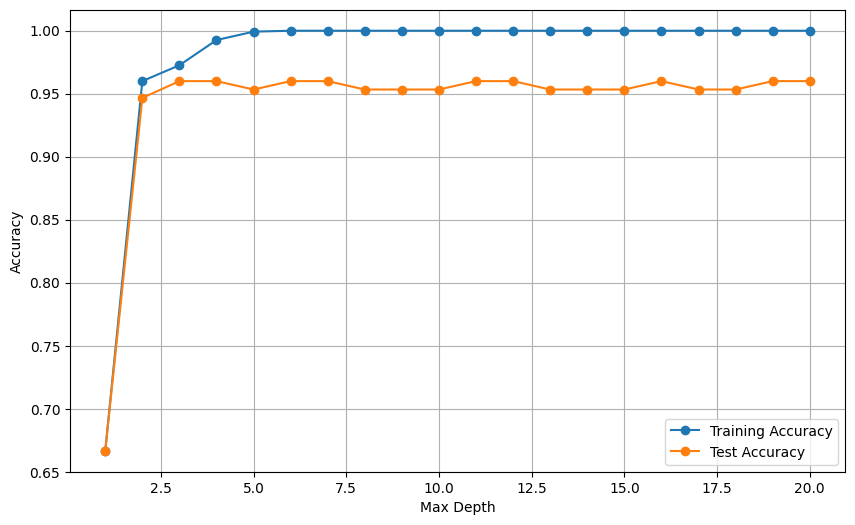

In [10]:
max_depths = range(1, 21)

train_scores = []
test_scores = []

for max_depth in max_depths:
    tree= DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)

    scores = cross_validate(tree, X, y, cv=10, return_train_score=True)
    
    train_acc = np.mean(scores['train_score'])
    test_acc = np.mean(scores['test_score'])

    train_scores.append(train_acc)
    test_scores.append(test_acc)

plt.figure(figsize=(10, 6))
plt.plot(max_depths, train_scores, label='Training Accuracy', marker='o')
plt.plot(max_depths, test_scores, label='Test Accuracy', marker='o')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

## 課題3-2．決定木の最大深さmax_depthを変更したときに得られる決定木の違いと分類性能について考察しなさい．

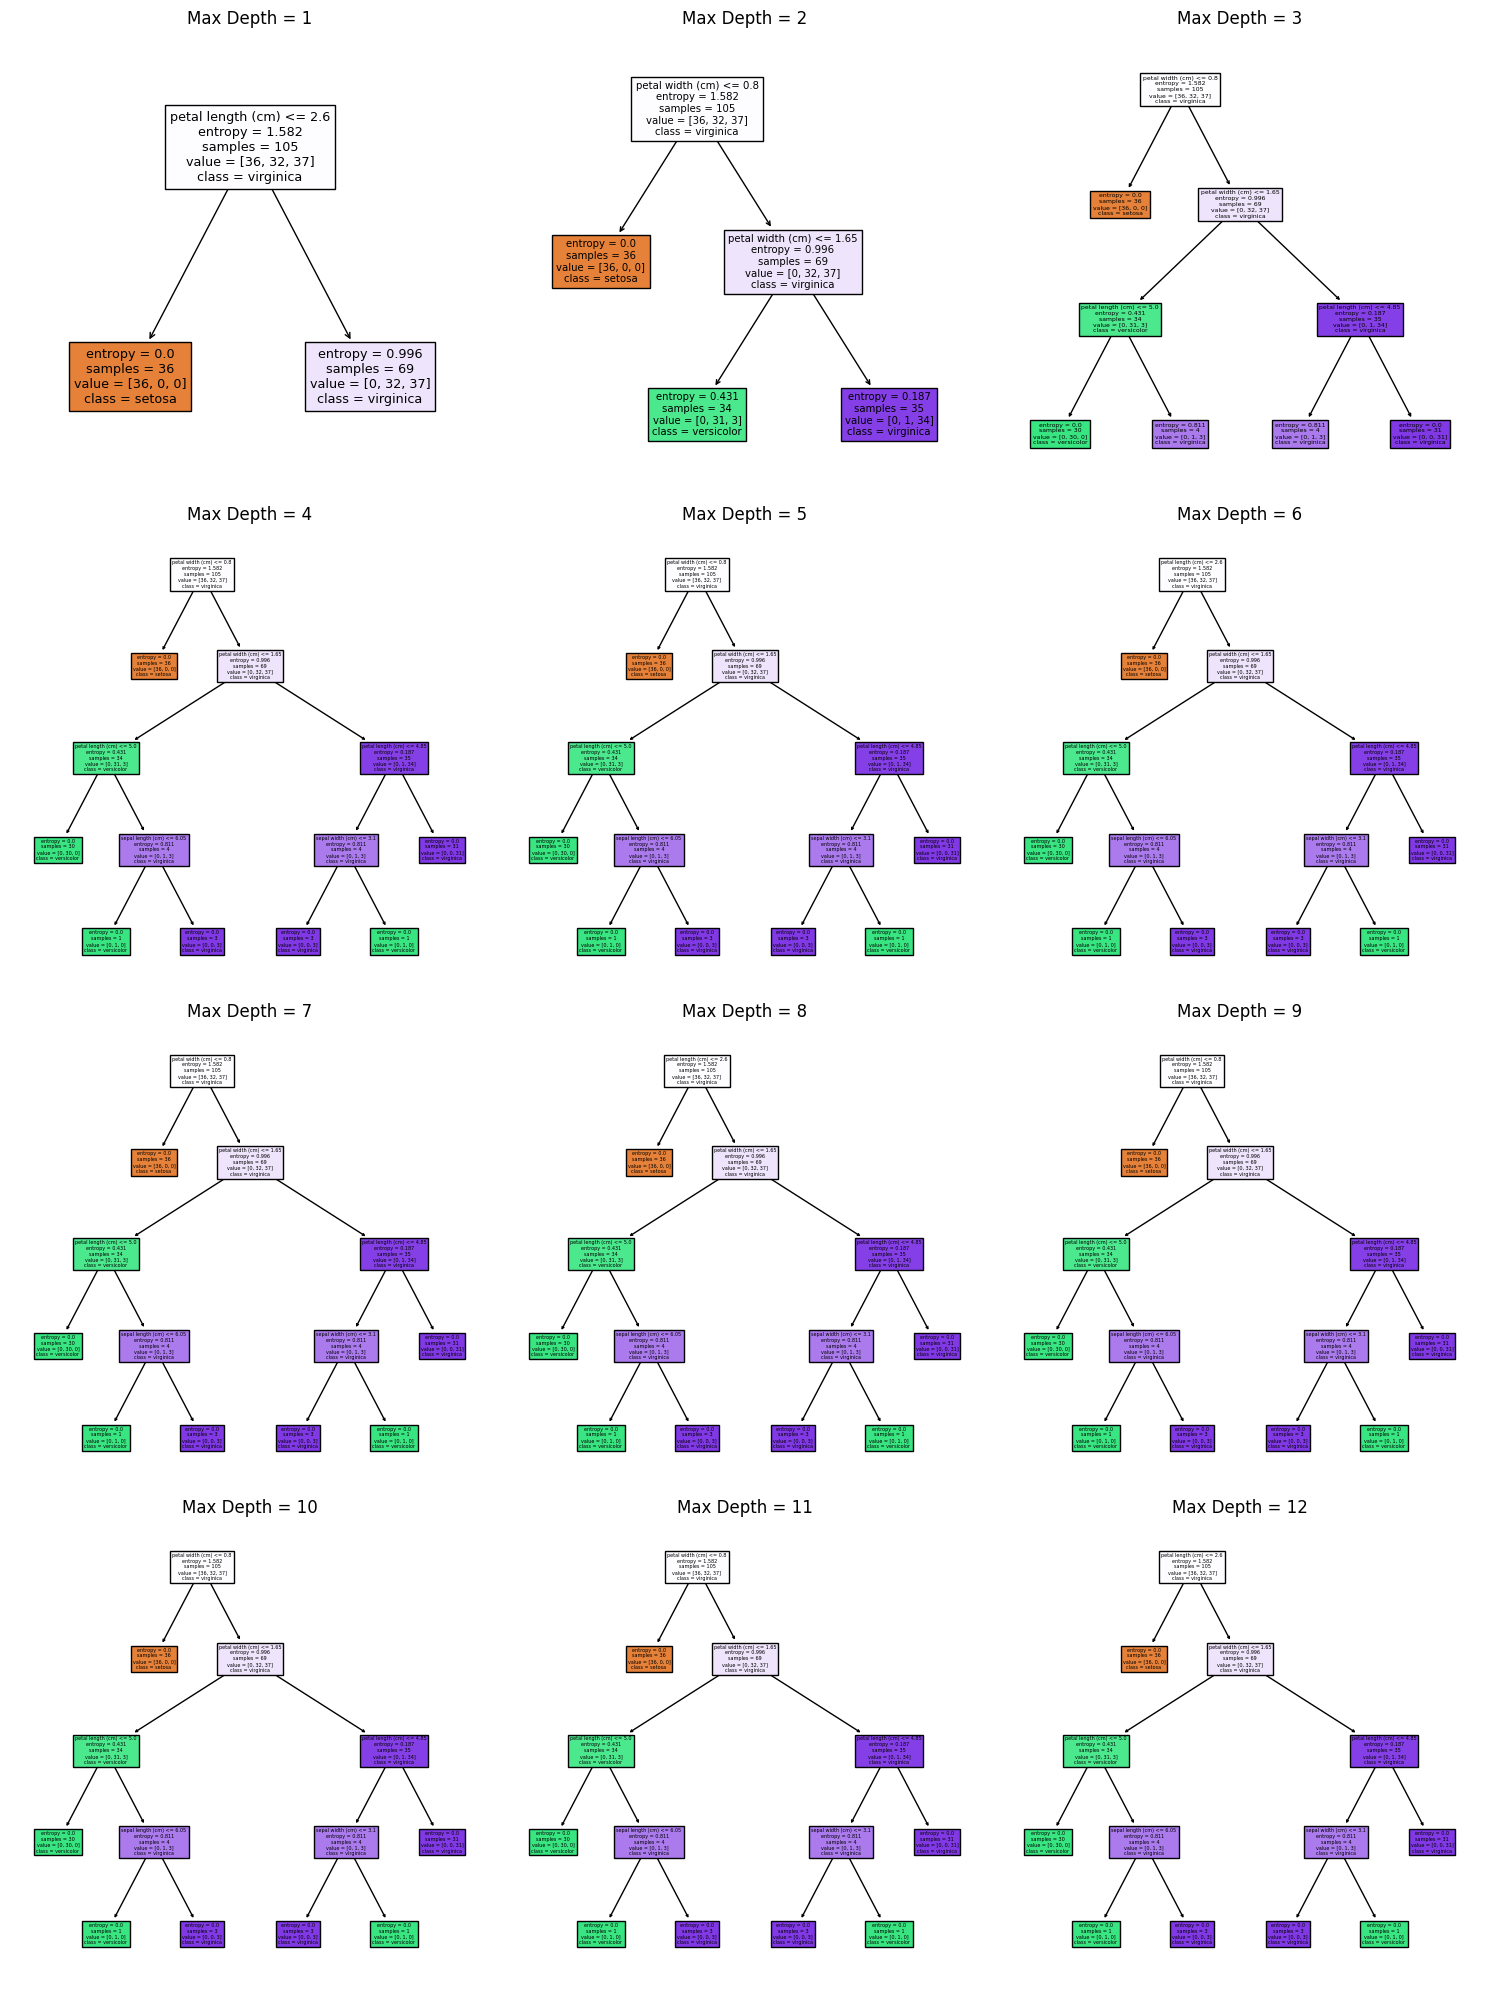

In [11]:
max_depths = range(1, 13)

train_scores = []
test_scores = []

num_columns = 3
num_rows = 4
fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, 5 * num_rows))
for max_depth in max_depths:
    tree= DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    trained_model = tree.fit(X_train, y_train)
    
    ax = axes[(max_depth-1) // num_columns, (max_depth-1) % num_columns]
    plot_tree(tree, feature_names=iris.feature_names, class_names=list(iris.target_names), filled=True, ax=ax)
    ax.set_title(f'Max Depth = {max_depth}')
    
plt.tight_layout()
plt.show()

決定木の最大深さが小さいと、木構造は単純なものになり、分類性能も低い。\
決定木の最大深さが大きいと、分類精度は上がる。\
今回の例では、最大深さが４以上のものは同様の木構造となっているが、\
より複雑な木構造になり、トレーニングデータに対し過学習になってしまう可能性もあると考えられる。